# Pandas I: 자료구조 - Series, DataFrame

### Pandas Documentation

[API Reference](http://pandas.pydata.org/pandas-docs/stable/api.html)

[Tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)

- [10 Minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
<br><br>
- [Cookbook](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)
<br><br>
- [Cheat sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)


### Pandas
- 고수준의 빠르고 쉬운 데이터 분석 도구 포함
- NumPy 기반에서 개발

### Pandas import 컨벤션
```python
from pandas import Series, DataFrame

import pandas as pd
```


### DataFrame 구조

<img src="http://bookdata.readthedocs.io/en/latest/_images/base_01_pandas_5_0.png">

---

# 1. pandas 자료 구조

### 1.1 Series

- Series는 일련의 객체를 담을 수 있는 1차원 배열 같은 자료 구조(어떤 NumPy 자료형이라도 담을 수 있다)
- 색인을 "자동으로" 제공한다

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np

In [111]:
# Series 생성
obj = Series([-2, -1, 0, 1, 2])
obj

0   -2
1   -1
2    0
3    1
4    2
dtype: int64

In [112]:
obj.values

array([-2, -1,  0,  1,  2])

In [113]:
obj.index

RangeIndex(start=0, stop=5, step=1)

In [114]:
# 색인 지정
obj2 = Series([-2, -1, 0, 1, 2], index=['a', 'b', 'c', 'd', 'd'])
obj2

a   -2
b   -1
c    0
d    1
d    2
dtype: int64

In [6]:
obj2.index

Index(['a', 'b', 'c', 'd', 'd'], dtype='object')

In [7]:
# 색인으로 value에 접근
obj2['d']

d    1
d    2
dtype: int64

In [8]:
obj2['d'] = 3
obj2['c'] = 2

In [9]:
obj2[['c', 'a', 'd']]

c    2
a   -2
d    3
d    3
dtype: int64

In [10]:
obj2

a   -2
b   -1
c    2
d    3
d    3
dtype: int64

In [11]:
# 불리언 색인
obj2[obj2 > 0]

c    2
d    3
d    3
dtype: int64

In [12]:
# Broadcasting 연산
obj2 * 2

a   -4
b   -2
c    4
d    6
d    6
dtype: int64

In [13]:
np.exp(obj2)

a     0.135335
b     0.367879
c     7.389056
d    20.085537
d    20.085537
dtype: float64

In [14]:
# in 사용: index에 적용 - 파이썬 기본타입 사전과 유사
'b' in obj2

True

In [15]:
'e' in obj2

False

In [16]:
# 파이썬 기본 타입인 dictionary로부터 series 생성
sdata = {'Ohio'  : 35000,
         'Texas' : 71000,
         'Oregon': 16000,
         'Utah'  : 5000}

In [17]:
obj3 = Series(sdata)

In [18]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [19]:
states = ['California', 'Ohio', 'Oregon', 'Texas']

In [20]:
obj4 = Series(sdata, index=states)

In [21]:
# 인덱스 'California'에 해당하는 값이 없으므로 NaN으로 표시
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

#### NaN(not a number)

- pandas에서는 누락된 값 혹은 NA 값으로 취급
- pandas의 isnull과 notnull 함수는 누락된 함수를 찾을 때 사용
- np.nan

In [22]:
# NaN값이면 True를 반환하고 값이 있을 경우 False를 반환한다
pd.isnull(obj4)

# Instance Method
obj4.isnull()

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

In [23]:
# NaN값이면 False를 반환하고 값이 있을 경우 True를 반환한다
pd.notnull(obj4)

# Instance Method
obj4.notnull()

California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool

In [24]:
obj3

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

In [25]:
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [26]:
obj3 + obj4

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64

In [27]:
obj4.name = 'population'

In [28]:
obj4.index.name = 'state'

In [29]:
obj4

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64

In [30]:
obj = Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [31]:
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
obj

Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64

### 1.2 DataFrame

- 표 같은 스프레드시트 형식의 자료 구조
- 각 컬럼은 서로 임의의 데이터  형식(숫자, 문자열, 불리언)을 담을 수 있다

#### DataFrame 객체 생성

In [32]:
# 사전으로부터 데이터프레임 생성
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002],
        'pop'  : [1.5, 1.7, 3.6, 2.4, 2.9]}

In [33]:
frame = DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [34]:
# 원하는 순서대로 Column 지정 가능
# SQL에서 SELECT year, state pop FROM data 와 비슷하게 컬럼명 순서를 지정할 수 있다.
DataFrame(data, columns=['year', 'state', 'pop'])

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9


In [35]:
# 없는 칼럼 값을 주면 NaN으로 채워서 보여준다.(아래에서 debt)
# 인덱스 값을 새롭게 정의할 수 있다.
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                   index=['one', 'two', 'three', 'four', 'five'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [36]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [37]:
frame2.index

Index(['one', 'two', 'three', 'four', 'five'], dtype='object')

In [38]:
# 컬럼(열) 명으로 얻는 방법
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [39]:
# 같은 결과를 얻는다 (속성 값으로 액세스)
frame2.state

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
Name: state, dtype: object

In [40]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
Name: year, dtype: int64

#### 행 선택시 사용 메소드:  index 이름 - loc(),  index 위치 - iloc()

In [41]:
frame2.loc['three']

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [42]:
frame2.iloc[2]

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [43]:
# 대부분의 연산은 Broadcasting
frame2['debt'] = 16.5
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5


In [44]:
# 리스트를 사용하여 컬럼 값 입력
d_value = [10,20,300,400,5000]
frame2['debt'] = d_value
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,10
two,2001,Ohio,1.7,20
three,2002,Ohio,3.6,300
four,2001,Nevada,2.4,400
five,2002,Nevada,2.9,5000


In [45]:
# 시리즈를 사용하여 컬럼 값을 입력 (없는 값은 NaN)
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
val

two    -1.2
four   -1.5
five   -1.7
dtype: float64

In [46]:
type(val)

pandas.core.series.Series

In [47]:
frame2['debt'] = val
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [48]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False


In [49]:
# 컬럼을 삭제하는 명령으로 del이 있다.
# 참고로 복사본을 만들지 않고 원본을 바로 수정하므로 주의해야 한다.
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7


In [50]:
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

- DataFrame의 색인을 이용해서 생성된 칼럼은 내부 데이터에 대한 view이며 복사가 이루어지지 않는다.
- 따라서 이렇게 얻은 Series 객체에 대한 변경은 실제 DataFrame에 반영된다.
- 복사본이 필요할 때는 Series의 copy 메서드를 이용하자

#### 중첩된 사전을 이용해서 데이터 생성

In [51]:
# 중첩된 사전으로부터 데이터프레임을 만들 수 있다.
# 바깥의 인덱스 명이 열이 된다.
pop = {'Nevada': {2001: 2.4,
                  2002: 2.9},
       'Ohio':   {2000: 1.5,
                  2001: 1.7,
                  2002: 3.6}}
pop

{'Nevada': {2001: 2.4, 2002: 2.9}, 'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [52]:
frame3 = DataFrame(pop)
frame3

,Nevada,Ohio
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [53]:
frame3['Ohio'][0:2]

2000    1.5
2001    1.7
Name: Ohio, dtype: float64

In [54]:
frame3['Nevada'][:2]

2000    NaN
2001    2.4
Name: Nevada, dtype: float64

In [55]:
# 행과 열을 바꿀 수 있다 (transpose)
frame3.T

,2000,2001,2002
Nevada,NaN,2.4,2.9
Ohio,1.5,1.7,3.6


#### index를 직접 지정한다면 지정된 색인으로 DataFrame 생성

In [56]:
# 인덱스를 명시적으로 지정할 수 있다
# 값이 없으면 NaN이 된다
DataFrame(frame3, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [57]:
pdata = {'Ohio': frame3['Ohio'][:-1],
         'Nevada': frame3['Nevada'][:2]}
DataFrame(pdata)

,Ohio,Nevada
2000,1.5,NaN
2001,1.7,2.4


In [58]:
# 인덱스와 열의 이를을 별도로 지정할 수 있다.
frame3.index.name = 'year'; frame3.columns.name = 'state'
frame3

state,Nevada,Ohio
year,,
2000,NaN,1.5
2001,2.4,1.7
2002,2.9,3.6


In [59]:
# 내용만 보려면 value를 사용한다
frame3.values

array([[nan, 1.5],
       [2.4, 1.7],
       [2.9, 3.6]])

#### DataFrame 생성자에서 사용 가능한 입력 데이터

형 | 설명
:--- |:---
2차원 ndarray | 데이터를 담고 있는 행렬. 선택적으로 로우와 칼럼의 이름을 전달할 수 있다.
배열, 리스트, 튜플의 사전 | 사전의 모든 항목은 같은 길이를 가져야 하며, 각 항목의 내용이 DataFrame의 칼럼이 된다.
NumPy의 구조화 배열 | 배열의 사전과 같은 방식으로 취급된다.
Series 사전 | Series의 각 값이 컬럼이 된다. 명시적으로 색인을 넘겨주지 않으면 각 Series의 색인이 하나로 합쳐져서 형의 색인이 된다.
사전의 사전 | 내부에 있는 사전이 칼럼이 된다. 키 값은 'Series의 사전'과 마찬가지로 합쳐져 로우의 색인이 된다.
사전이나 Series의 리스트 | 리스트의 각 항목이 DataFrame의 로우가 된다. 합쳐진 사전의 키 값이나 Series의 색인이 DataFrame 칼럼의 이름이 된다.
리스트나 튜플의 리스트 | '2차원 ndarray'와 같은 방식으로 취급된다.
다른 DataFrame | 색인이 따로 지정되지 않는다면 DataFrame의 색인이 그대로 사용된다.
NumPy MaskedArray | '2차원 ndarray'와 같은 방식으로 취급되지만 마스크 값은 반환되는 DataFrame에서 NA 값이 된다.

### 1.3 색인 객체

- pandas의 색인 객체는 표 형식의 데이터에서 각 로우와 칼럼에 대한 이름과 다른 메타데이터(축의 이름 등)를 저장하는 객체
- Series나 DataFrame 객체를 생성할 때 사용하는 배열이나 혹은 다른 순차적인 이름은 내부적으로 색인으로 변환

In [60]:
obj = Series(range(3), index=['a', 'b', 'c'])

In [61]:
# 인덱스 객체를 얻을 수 있다
index = obj.index

In [62]:
index

Index(['a', 'b', 'c'], dtype='object')

In [63]:
index[1:]

Index(['b', 'c'], dtype='object')

In [64]:
# 색인 객체 변경 불가
index[1] = 'd'

TypeError: Index does not support mutable operations

In [ ]:
index = pd.Index(np.arange(3))
index

In [ ]:
# index=는 함수의 키워드, 뒤의 index는 변수
obj2 = Series([1.5, -2.5, 0], index=index)
obj2

In [ ]:
obj2.index is index

In [ ]:
obj2.index

In [ ]:
index

#### pandas의 주요 Index 객체

클래스 | 설명
:---|:---
Index | 가장 일반적인 Index 객체이며, 파이썬 객체의 NumPy 배열 형식으로 축의 이름을 표현한다.
Int64Index | 정수 값을 위한 특수한 Index
MultiIndex | 단일 축에 여러 단계의 색인을 표현하는 계층적 색인 객체. 튜플의 배열과 유사하다고 볼 수 있다.
DatetimeIndex | 나노초 타임스탬프를 저장한다(NumPy의 datetime64 dtype으로 표현된다).
PeriodIndex | 기간 데이터를 위한 특수한 Index

In [ ]:
frame3

In [ ]:
'Ohio' in frame3.columns

In [ ]:
2010 in frame3.index

In [ ]:
1.5 in frame3.values

In [ ]:
index2 = pd.Index(np.arange(5))
index2

In [ ]:
sum_index = index.append(index2)
sum_index

#### 인덱스 메서드

메서드 | 설명
:---|:---
append | 추가적인 Index 객체를 덧붙여 새로운 색인을 반환한다.
diff | 색인의 차집합을 반환한다.
intersection | 색인의 교집합을 반환한다.
union | 색인의 합집합을 반환한다.
isin | 넘겨받은 값이 해당 색인 위치에 존재하는지 알려주는 불리언 배열을 반환한다.
delete | i 위치의 색인이 삭제된 새로운 색인을 반환한다.
drop | 넘겨받은 값이 삭제된 새로운 색인을 반환한다.
insert | i 위치에 값이 추가된 새로운 색인을 반환한다.
is_monotonic | 색인이 단조성을 가진다면 True를 반환한다.
is_unique | 중복되는 색인이 없다면 True를 반환한다.
unique | 색인에서 중복되는 요소를 제거하고 유일한 값만을 반환한다.

---

# 2. 핵심 기능

### 2.1 재색인 - reindex()

- 새로운 색인에 맞도록 객체를 새로 생성(재배열)하는 기능
- 색인 값이 없다면 NaN 추가
- 원본 데이터 보존, 리턴값을 새로운 변수에 할당해서 사용

#### <참고> reset_index(), set_index()
#### <참고> rename() : 컬럼 이름 변경

In [ ]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c'])
obj

In [ ]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])
obj2

In [ ]:
# fill_value는 빠진 데이터를 채워넣을 수 있다.
obj.reindex(['a', 'b', 'c', 'd', 'e'], fill_value=0)

In [ ]:
# 원본 데이터 보존
obj

#### 시계열 같은 순차적인 데이터를 재색인할 때 값을 보간하거나 채워 넣어야 할 경우

In [ ]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 3])
obj3

In [ ]:
#ffill은 앞의 값을 채워넣는다.
obj3.reindex(range(6), method='ffill')

#### reindex 메서드(보간) 옵션

인자 | 설명
:---|: ---
ffill 또는 pad | 앞의 값으로 채워 넣는다.
bfill 또는 backfill | 뒤의 값으로 채워 넣는다.

In [ ]:
frame = DataFrame(np.arange(9).reshape((3, 3)),
                  index=['a', 'c', 'd'],
                  columns=['Ohio', 'Texas', 'California'])
frame

In [ ]:
# Index(행) 재배열
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
frame2

In [ ]:
# columns(열) 재배열
states = ['Texas', 'Utah', 'California']

In [ ]:
frame.reindex(columns=states)
frame

In [ ]:
frame.reindex(index=['a','b','c','d'], columns=states)

In [ ]:
frame.reindex(index=['a','b','c','d'], method='ffill')

#### 재색인 함수 인자

인자 | 설명
:---|:---
index| 색인으로 사용할 새로운 순서. Index 인스턴스나 다른 순차적인 자료 구조를 사용할 수 있다. 색인은 복사가 이루어지지 않고 그대로 사용된다.
method | 보간 메서드
fill_value | 재색인 과정 중에 새롭게 나타나는 비어있는 데이터를 채우기 위한 값
limit | 전/후 보간 시에 사용할 최대 갭 크기
level | MultiIndex 단계(level)에 단순 색인을 맞춘다. 그렇지 않으면 MultiIndex의 하위 부분집합에 맞춘다.
copy | True인 경우 새로운 색인이 이전 색인과 같더라도 데이터를 복사한다. False라면 두 색인이 같은 경우 데이터를 복사하지 않는다.

### 2.2 행 또는 열 삭제

In [ ]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

In [ ]:
# drop으로 행 삭제하기
new_obj = obj.drop('c')

In [ ]:
new_obj

In [ ]:
obj.drop(['d', 'c'])

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

In [ ]:
data.drop(['Colorado', 'Ohio'])

In [ ]:
# 컬럼(열) 삭제
data.drop('two', axis=1)

In [ ]:
data.drop(['two', 'four'], axis=1)

### 2.3 색인하기, 선택하기, 거르기

- Series의 색인은 NumPy 배열의 색인과 유사하게 동작하는데, Seriese의 색인은 정수가 아니어도 된다는 점이 다르다.

#### Series

In [ ]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
#obj = Series([1, 1.1, 2, 3], index=['a', 'b', 'c', 'd'])
obj

In [ ]:
obj['b']

In [ ]:
obj[1]

In [ ]:
obj[2:4]

In [ ]:
obj[['b', 'a', 'd']]

In [ ]:
obj[[1, 3]]

In [ ]:
obj[obj < 2]

#### 라벨 이름으로 슬라이싱하면 시작점과 끝점을 포함한다

In [ ]:
# 양 끝점을 포함시킨다
obj['b':'c']

In [ ]:
obj['b':'c'] = 5

In [ ]:
obj

#### DataFrame

In [ ]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                 index=['Ohio', 'Colorado', 'Utah', 'New York'],
                 columns=['one', 'two', 'three', 'four'])
data

#### 열을 기준으로 선택

In [ ]:
data['two']

In [ ]:
data[['three','one']]

#### 슬라이싱 이나 불리언 배열을 사용하면 행을 기준으로 선택

In [ ]:
data[:2]

In [ ]:
# 칼럼 'three'의 값이 5 초과인 값들을 가져온다.
data[data['three'] > 5]

In [ ]:
data

In [ ]:
data < 5

In [ ]:
data[data < 5] = 0

In [ ]:
data

####   loc(): index 이름 ,  iloc(): index 위치

In [ ]:
data.loc['Colorado', ['two', 'three']]

In [ ]:
data.loc[['Colorado', 'Utah'], ['two', 'three']]

In [ ]:
data.iloc[[1, 2], [3, 0, 1]]

In [ ]:
data.loc[:'Utah', 'two']

In [ ]:
data.loc[data.three > 5, :'three']

### 2.4 산술연산과 데이터 정렬

#### Series

In [ ]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e'])
s1

In [ ]:
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g'])
s2

In [ ]:
s1 + s2

#### DataFrame

In [ ]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)),
                columns=list('bcd'),
                index=['Ohio', 'Texas', 'Colorado'])

In [ ]:
df2 = DataFrame(np.arange(12.).reshape((4, 3)),
                columns=list('bde'),
                index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1 + df2

#### 산술연산 메서드에 채워 넣을 값 지정하기

In [ ]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)), columns=list('abcd'))

In [ ]:
df2 = DataFrame(np.arange(20.).reshape((4, 5)), columns=list('abcde'))

In [ ]:
df1

In [ ]:
df2

In [ ]:
df1 + df2

In [ ]:
df1.add(df2)

In [ ]:
df1.add(df2, fill_value=0)

In [ ]:
df1.add(df2, fill_value=1000)

In [ ]:
df1.reindex(columns=df2.columns, fill_value=0)

#### 산술연산 메서드

메서드 | 설명
:---|:---
add | 덧셈(+)을 위한 메서드
sub | 뺄셈(-)을 위한 메서드
div | 나눗셈(/)을 위한 메서드
mul | 곱셈(*)을 위한 메서드

#### 브로드캐스팅

In [ ]:
frame = DataFrame(np.arange(12.).reshape((4, 3)),
                  columns=list('bde'),
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
series = frame.iloc[0]

In [ ]:
series

In [ ]:
frame - series

In [ ]:
series2 = Series(range(3), index=['b', 'e', 'f']) 
series2

In [ ]:
frame + series2

In [ ]:
series3 = frame['d']

In [ ]:
frame

In [ ]:
series3

In [ ]:
frame.sub(series3, axis=0)

### 2.5 함수 적용과 매핑

- DataFrame
  - apply()
  - applymap()
- Series
  - apply()
  - map()

In [ ]:
frame = DataFrame(np.random.randn(4, 3),
                  columns=['b', 'd', 'e'],
                  index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame

In [ ]:
np.abs(frame)

In [ ]:
f = lambda x: x.max() - x.min()

In [ ]:
frame.apply(f)

In [ ]:
frame.apply(f, axis=0)

In [ ]:
frame.apply(f, axis=1)

In [ ]:
frame

In [ ]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max'])

In [ ]:
frame.apply(f)

In [ ]:
format = lambda x: '{:.2f}'.format(x)

In [ ]:
frame.applymap(format)

In [ ]:
frame['e'].map(format)

In [ ]:
frame1 = DataFrame(np.arange(12).reshape(4, 3),
                   columns=['b', 'd', 'e'],
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])
frame1

In [ ]:
dic = {2:'a',5:'b',8:'c',11:'d'}

#### Series의 apply(), map() 차이 비교

In [ ]:
frame1['e'].map(dic)

In [ ]:
frame1['e'].apply(lambda x: dic[x])

#### <비교> 문자열 합치기

In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year' : [2000, 2001, 2002, 2001, 2002],
        'pop'  : [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
df

In [ ]:
df['year_state'] = df[['year','state']].apply(lambda x: '_'.join(x.astype(str)), axis=1)
df

In [ ]:
df['year_state'] = df['year'].astype(str)  +  '_'  +  df['state']
df

### 2.6 정렬과 순위

In [ ]:
obj = Series(range(4), index=['d', 'a', 'b', 'c'])
obj

In [ ]:
obj.sort_index()

In [ ]:
frame = DataFrame(np.arange(8).reshape((2, 4)), index=['three', 'one'],
                  columns=['d', 'a', 'b', 'c'])
frame

In [ ]:
# 행 기준 정렬(Default)
frame.sort_index()

In [ ]:
# 열 기준 정렬
frame.sort_index(axis=1)

In [ ]:
frame.sort_index(axis=0, ascending=False)

In [ ]:
frame.sort_index(axis=0).sort_index(axis=1)

In [ ]:
obj = Series([4, 7, -3, 2])

In [ ]:
# 값에 따라 정렬
obj.sort_values()

In [ ]:
obj = Series([4, np.nan, 7, np.nan, -3, 2])

In [ ]:
obj.sort_values()

In [ ]:
frame = DataFrame({'b': [4, 7, -3, 2],
                   'a': [0, 1, 0, 1]})

In [ ]:
frame

In [ ]:
frame.sort_values(by='b')

In [ ]:
frame.sort_values(by=['a', 'b'])

### 2.7 중복 색인

In [ ]:
obj = Series(range(5), index=['a', 'a', 'b', 'b', 'c'])
obj

In [ ]:
# obj의 index값이 유니크한지 점검.
obj.index.is_unique

In [ ]:
obj['a']

In [ ]:
obj['c']

In [ ]:
df = DataFrame(np.random.randn(4, 3), index=['a', 'a', 'b', 'b'])
df

In [ ]:
df.loc['b']

---

# 3. 기술통계 계산과 요약

### 3.1 기술통계 계산과 요약

In [ ]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
                [np.nan, np.nan], [0.75, -1.3]],
               index=['a', 'b', 'c', 'd'],
               columns=['one', 'two'])
df

In [ ]:
# NaN은 제외하고 계산
df.sum()

In [ ]:
# 각 행의 합 반환
df.sum(axis=1)

In [ ]:
df.mean(axis=1, skipna=False)

#### 축소 메서드 옵션

옵션 | 설명
:---|:---
axis | 연산을 수행할 축. DataFrame에서 0은 로우고 1은 칼럼이다.
skipna | 누락된 값을 제외할 것인지 정하는 옵션. 기본값은 True다.
level | 계산하려는 축이 계층적 색인(다중 색인)이라면 레벨에 따라 묶어서 계산한다.

In [ ]:
df.idxmax()

In [ ]:
# cumulative. 아래로 갈수록 누산 됨
df.cumsum()

In [ ]:
df.describe()

In [ ]:
obj = Series(['a', 'a', 'b', 'c'] * 4)
obj

In [ ]:
obj.describe()

#### 기술통계와 요약통계

메서드 | 설명
:---|:---
count | NA 값을 제외한 값의 수를 반환한다.
describe | Series나 DataFrame의 각 칼럼에 대한 요약통계를 계산한다.
min, max | 최소, 최대값을 계산한다.
argmin, argmax | 각각 최소, 최대값을 갖고 있는 색인의 위치(정수)를 반환한다.
idxmin, idxmax | 각각 최소, 최대 값을 갖고 있는 색인의 값을 반환한다.
quantile | 0부터 1까지의 분위수를 계산한다.
sum | 합을 계산한다.
mean | 평균을 계산한다.
median | 중간 값(50% 분위)을 반환한다.
mad | 평균 값에서 절대 평균편차를 구한다.
var | 표본 분산의 값을 구한다.
std | 표본 정규 분산의 값을 구한다.
skew | 표본 비대칭도(3차 적률)의 값을 구한다.
cumsum | 누적 합을 구한다.
cummin, cummax | 각각 누적 최소 값과 누적 최대 값을 계산한다.
cumprod | 누적 곱을 구한다.
diff | 1차 산술 차를 구한다(시게열 데이터 처리시 유용하다).
pct_change | 퍼센트 변화율을 계산한다.

### 3.2 unique, value_counts

In [ ]:
obj = Series(['c', 'a', 'd', 'a', 'a', 'b', 'b', 'c', 'c'])
obj

In [ ]:
uniques = obj.unique()

In [ ]:
uniques

In [ ]:
# Series에서 도수를 계산하여 반환한다.
obj.value_counts()

In [ ]:
# array
obj.values

In [ ]:
# pandas 최상위 메소드
pd.value_counts(obj.values)

In [ ]:
# 어떤 값이 Series에 있는지 나타내는 불리언 벡터를 반환해줌.
mask = obj.isin(['b', 'c'])

In [ ]:
mask

In [ ]:
obj[mask]

#### unique, value_counts
메서드 | 설명
:---|:---
isin | Series의 각 원소가 넘겨받은 연속된 값에 속하는지를 나타내는 불리언 배열을 반환한다.
unique | Series에서 중복되는 값을 제거하고 유일한 값만 포함하는 배열을 반환한다. 결과는 Series에서 발견된 순서대로 반환된다.
value_counts | Series에서 유일 값에 대한 색인 값과 도수를 계산한다. 결과는 도수 값의 내림차순으로 정렬된다.

#### DataFrame의 여러 행에 대한 히스토그램

In [65]:
data = DataFrame({'Qu1': [1, 3, 4, 3, 4],
                  'Qu2': [2, 3, 1, 2, 3],
                  'Qu3': [1, 5, 2, 4, 4]})

In [66]:
data

,Qu1,Qu2,Qu3
0,1,2,1
1,3,3,5
2,4,1,2
3,3,2,4
4,4,3,4


In [67]:
pd.value_counts

<function pandas.core.algorithms.value_counts(values, sort=True, ascending=False, normalize=False, bins=None, dropna=True)>

In [68]:
data['Qu3'].value_counts

<bound method IndexOpsMixin.value_counts of 0    1
1    5
2    2
3    4
4    4
Name: Qu3, dtype: int64>

In [69]:
# Qu1, Qu2, Qu3에 대한 유일한 값에 대한 카운트를 얻는다
result = data.apply(pd.value_counts)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [70]:
# value_counts 메서드의 결과가 DataFrame의 칼럼 크기보다 작을 수 있기 때문에
# fillna(0)함수로 비어있는 값은 0으로 채워준다.
result = data.apply(pd.value_counts).fillna(0)
result

,Qu1,Qu2,Qu3
1,1.0,1.0,1.0
2,0.0,2.0,1.0
3,2.0,2.0,0.0
4,2.0,0.0,2.0
5,0.0,0.0,1.0


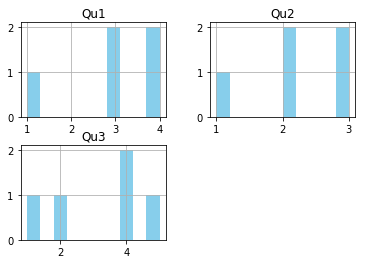

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

data.hist(color='skyblue')
plt.show()

---

# 4. 누락된 데이터(결측치) 처리하기

- 모든 기술통계는 누락된 데이터를 배제하고 처리

In [72]:
string_data = Series(['aardvark', 'artichoke', np.nan, 'avocado'])

In [73]:
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [74]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [75]:
string_data[0] = None

In [76]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

#### NA 처리 메서드

인자 | 설명
:---|:---
dropna | 누락된 데이터가 있는 축(로우, 칼럼)을 제외시킨다. 어느 정도의 누락 데이터까지 용인할 것인지 지정할 수 있다.
fillna | 누락된 데이터를 대신할 값을 채우거나 'ffill' 또는 'bfill' 같은 보간 메서드를 적용한다.
isnull | 누락되거나 NA인 값을 알려주는 불리언 값이 저장된, 같은 형의 객체를 반환한다.
notnull | isnull과 반대되는 메서드다.

### 4.1 누락된 데이터 골라내기

In [77]:
from numpy import nan as NA

In [78]:
data = Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [79]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [80]:
data[data.notnull()]

0    1.0
2    3.5
4    7.0
dtype: float64

In [81]:
data = DataFrame([[1., 6.5, 3.], [1., NA, NA],
                  [NA, NA, NA], [NA, 6.5, 3]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [82]:
cleaned = data.dropna()

In [83]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [84]:
# NA가 하나라도 있으면 drop
cleaned

,0,1,2
0,1.0,6.5,3.0


In [85]:
# how='all'옵션을 주면 모든 값이 NA인 로우만 제외시킴.
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [86]:
data[4] = NA

In [87]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [88]:
data.dropna(axis=0, how='all')

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [89]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [90]:
df = DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,-0.080909,-0.208513,-0.057636
1,-0.153647,1.164952,0.005381
2,0.383058,-0.035299,0.459229
3,0.902287,-0.588879,1.345305
4,-1.867077,0.318955,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [91]:
# ix는 slicing 마지막 문자까지 포함 됨
df.loc[:4, 1] = NA
df.loc[:2, 2] = NA

In [92]:
df

,0,1,2
0,-0.080909,NaN,NaN
1,-0.153647,NaN,NaN
2,0.383058,NaN,NaN
3,0.902287,NaN,1.345305
4,-1.867077,NaN,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [93]:
df.dropna(thresh=3)

,0,1,2
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


### 4.2 누락된 값 채우기

In [94]:
df.fillna(0)

,0,1,2
0,-0.080909,0.000000,0.000000
1,-0.153647,0.000000,0.000000
2,0.383058,0.000000,0.000000
3,0.902287,0.000000,1.345305
4,-1.867077,0.000000,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [95]:
# dictionary 형식으로 받았는데 앞의 key가 컬럼을 나타냄
df.fillna({1: 0.5, 3: -1})

,0,1,2
0,-0.080909,0.500000,NaN
1,-0.153647,0.500000,NaN
2,0.383058,0.500000,NaN
3,0.902287,0.500000,1.345305
4,-1.867077,0.500000,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [96]:
df.fillna({2:0.5, 1:-1})

,0,1,2
0,-0.080909,-1.000000,0.500000
1,-0.153647,-1.000000,0.500000
2,0.383058,-1.000000,0.500000
3,0.902287,-1.000000,1.345305
4,-1.867077,-1.000000,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [97]:
# fillna는 값을 채워 넣은 객체의 참조를 반환한다.
_ = df.fillna(0, inplace=True)

In [98]:
df

,0,1,2
0,-0.080909,0.000000,0.000000
1,-0.153647,0.000000,0.000000
2,0.383058,0.000000,0.000000
3,0.902287,0.000000,1.345305
4,-1.867077,0.000000,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [99]:
_ = df.fillna(1, inplace=False)

In [100]:
df

,0,1,2
0,-0.080909,0.000000,0.000000
1,-0.153647,0.000000,0.000000
2,0.383058,0.000000,0.000000
3,0.902287,0.000000,1.345305
4,-1.867077,0.000000,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [101]:
df.fillna(1, inplace=True)

In [102]:
# 이미 NA값이 0.0 으로 채워져있기 때문에 1로 바뀌지 않는다.
df

,0,1,2
0,-0.080909,0.000000,0.000000
1,-0.153647,0.000000,0.000000
2,0.383058,0.000000,0.000000
3,0.902287,0.000000,1.345305
4,-1.867077,0.000000,-1.471751
5,0.512982,-1.563167,1.811818
6,0.112811,2.285579,0.528467


In [103]:
df = DataFrame(np.random.randn(6, 3))

In [104]:
df.loc[2:, 1] = NA
df.loc[4:, 2] = NA

In [105]:
df

,0,1,2
0,-0.555681,-1.177866,-0.029185
1,-0.683449,-0.643206,0.155126
2,-1.741288,NaN,0.493247
3,0.193486,NaN,-0.299463
4,0.779719,NaN,NaN
5,-1.412387,NaN,NaN


In [106]:
df.fillna(method='ffill')

,0,1,2
0,-0.555681,-1.177866,-0.029185
1,-0.683449,-0.643206,0.155126
2,-1.741288,-0.643206,0.493247
3,0.193486,-0.643206,-0.299463
4,0.779719,-0.643206,-0.299463
5,-1.412387,-0.643206,-0.299463


In [107]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.555681,-1.177866,-0.029185
1,-0.683449,-0.643206,0.155126
2,-1.741288,-0.643206,0.493247
3,0.193486,-0.643206,-0.299463
4,0.779719,NaN,-0.299463
5,-1.412387,NaN,-0.299463


In [108]:
data = Series([1., NA, 3.5, NA, 7])

In [109]:
# Series의 평균 값이나 중간 값으로 전달한다.
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

In [110]:
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

#### fillna 함수 인자

인자 | 설명
:---|:---
value | 비어있는 값을 채울 스칼라 값이나 사전 형식의 객체
method | 보간 방식. 기본적으로 'ffill'을 사용한다.
axis | 값을 채워 넣을 축. 기본 값은 0
inplace | 복사본을 생성하지 않고 호출한 객체를 변경한다. 기본값은 False
limit | 값을 앞 혹은 뒤에서 몇 개까지 채울지를 지정한다.

---